# Решение задачи прогноза погоды
## Елисеев E.В.
Данные взяты с сайта https://rp5.ru/ <br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


filename = "weather.csv.gz"

In [3]:
# Считываем таблицу в переменную data, удалив первые 6 строк с комментариями
data = pd.read_csv(
    filename,
    skiprows=6,
    encoding='utf-8',
    compression='gzip',
    sep=';',
    index_col=False,
    parse_dates=[0],
    dayfirst=True,
    decimal='.',
)

data = data.drop(data.columns[8:], axis=1)
data

,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff
0,2022-01-01 21:00:00,-3.1,734.7,752.3,NaN,89,"Ветер, дующий с северо-запада",4
1,2022-01-01 18:00:00,-2.6,734.1,751.6,NaN,84,"Ветер, дующий с севера",3
2,2022-01-01 15:00:00,-1.4,733.2,750.6,NaN,83,"Ветер, дующий с северо-запада",4
3,2022-01-01 12:00:00,-1.5,733.2,750.6,NaN,92,"Ветер, дующий с западо-северо-запада",3
4,2022-01-01 09:00:00,-1.8,732.8,750.3,NaN,94,"Ветер, дующий с запада",4
...,...,...,...,...,...,...,...,...
15727,2016-08-01 15:00:00,28.5,744.9,760.8,NaN,44,"Ветер, дующий с юго-юго-запада",3
15728,2016-08-01 12:00:00,26.6,745.4,761.5,NaN,49,"Ветер, дующий с юго-юго-запада",3
15729,2016-08-01 09:00:00,23.7,745.3,761.5,NaN,60,"Ветер, дующий с запада",2
15730,2016-08-01 06:00:00,18.2,745.0,761.5,NaN,89,"Ветер, дующий с западо-юго-запада",2


In [4]:
# Проверка пропусков
condition_t_empty = data['T'].isna()
data[condition_t_empty]

,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff
1362,2021-07-15 15:00:00,NaN,743.2,759.5,NaN,89,"Ветер, дующий с западо-юго-запада",9
1505,2021-06-27 18:00:00,NaN,741.9,758.2,NaN,89,"Ветер, дующий с севера",6
2609,2021-02-08 21:00:00,NaN,749.4,768.2,NaN,82,Переменное направление,2
9218,2018-11-05 15:00:00,NaN,756.6,774.0,NaN,62,"Штиль, безветрие",0


In [5]:
# Удаляем пропуски
condition_t_good = data['T'].notna()
data = data[condition_t_good]

In [6]:
condition_rusdate_empty = data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'].isna()
data[condition_rusdate_empty]

,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff


In [7]:
# Есть ли пропуски в давлении 
condition_p_empty = data['P'].isna()
data[condition_p_empty]

,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff


In [8]:
# Изменение формата даты
data['date'] = pd.to_datetime(data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'])
data

C:\Users\santiperro\AppData\Local\Temp\ipykernel_2616\2184200694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'])


,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff,date
0,2022-01-01 21:00:00,-3.1,734.7,752.3,NaN,89,"Ветер, дующий с северо-запада",4,2022-01-01 21:00:00
1,2022-01-01 18:00:00,-2.6,734.1,751.6,NaN,84,"Ветер, дующий с севера",3,2022-01-01 18:00:00
2,2022-01-01 15:00:00,-1.4,733.2,750.6,NaN,83,"Ветер, дующий с северо-запада",4,2022-01-01 15:00:00
3,2022-01-01 12:00:00,-1.5,733.2,750.6,NaN,92,"Ветер, дующий с западо-северо-запада",3,2022-01-01 12:00:00
4,2022-01-01 09:00:00,-1.8,732.8,750.3,NaN,94,"Ветер, дующий с запада",4,2022-01-01 09:00:00
...,...,...,...,...,...,...,...,...,...
15727,2016-08-01 15:00:00,28.5,744.9,760.8,NaN,44,"Ветер, дующий с юго-юго-запада",3,2016-08-01 15:00:00
15728,2016-08-01 12:00:00,26.6,745.4,761.5,NaN,49,"Ветер, дующий с юго-юго-запада",3,2016-08-01 12:00:00
15729,2016-08-01 09:00:00,23.7,745.3,761.5,NaN,60,"Ветер, дующий с запада",2,2016-08-01 09:00:00
15730,2016-08-01 06:00:00,18.2,745.0,761.5,NaN,89,"Ветер, дующий с западо-юго-запада",2,2016-08-01 06:00:00


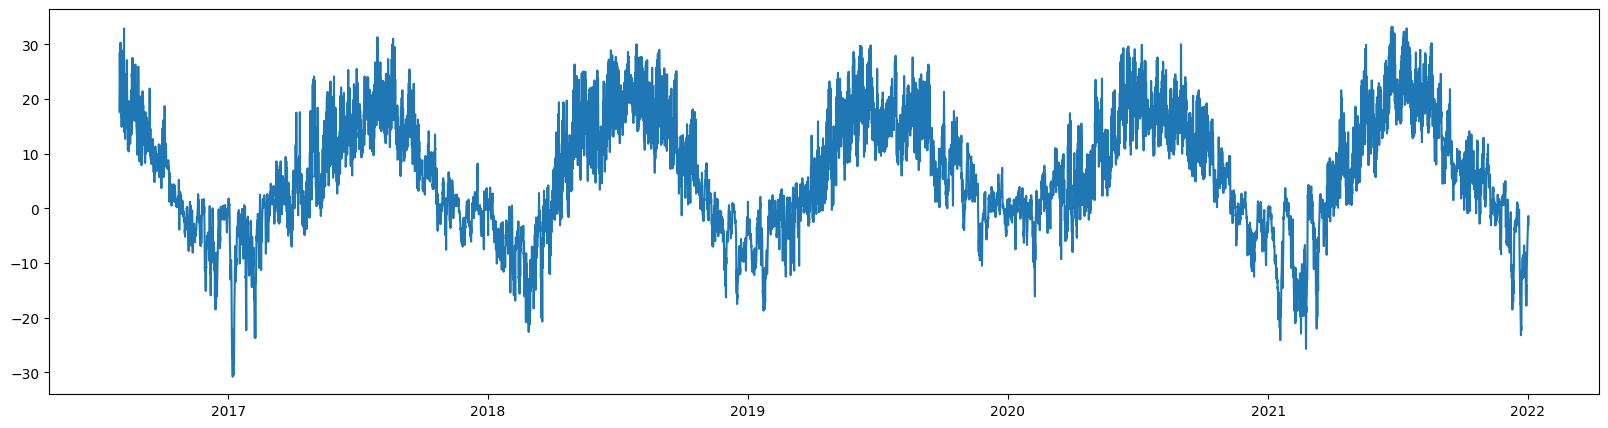

In [9]:
# График температуры

x = data['date']
y = data['T']
plt.figure(figsize=(20, 5))
plt.plot(x, y)

In [10]:
# Максимум, минимум, среднее

data['T'].min(), data['T'].max(), data['T'].mean()

(-30.8, 33.2, 6.482547049847405)

<AxesSubplot: >

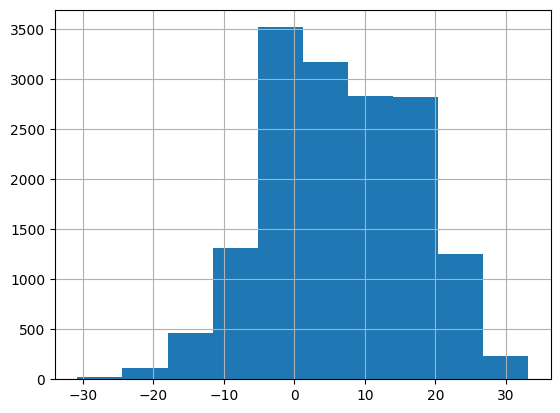

In [11]:
data['T'].hist()

In [12]:
data['T'].quantile(0.95), data['T'].quantile(0.05), data['T'].quantile(0.01)

(23.0, -10.364999999999998, -17.5)

(-13.6, 25.2)

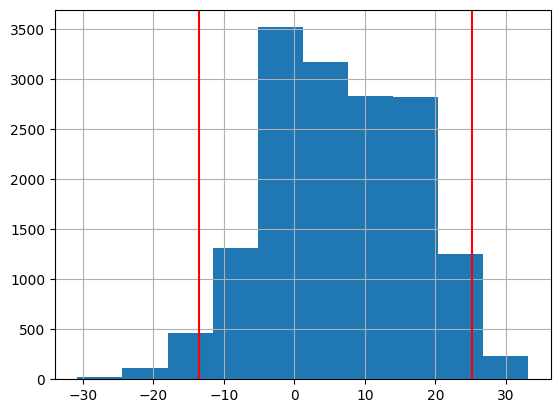

In [13]:
#  Наиболее вероятные значения

data['T'].hist()
plt.axvline(data['T'].quantile(0.975), color='red')
plt.axvline(data['T'].quantile(0.025), color='red')

data['T'].quantile(0.025), data['T'].quantile(0.975)

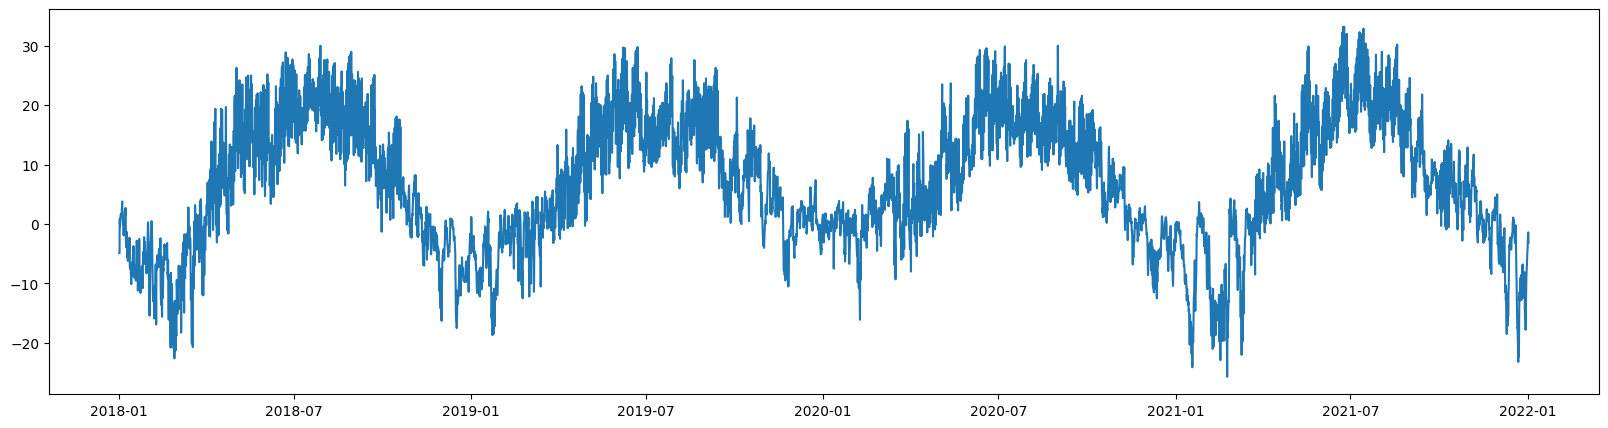

In [14]:
condition2018 = data['date'] > '2018-01-01'
data_short = data[condition2018]

plt.figure(figsize=(20, 5))
plt.plot(data_short['date'], data_short['T'])

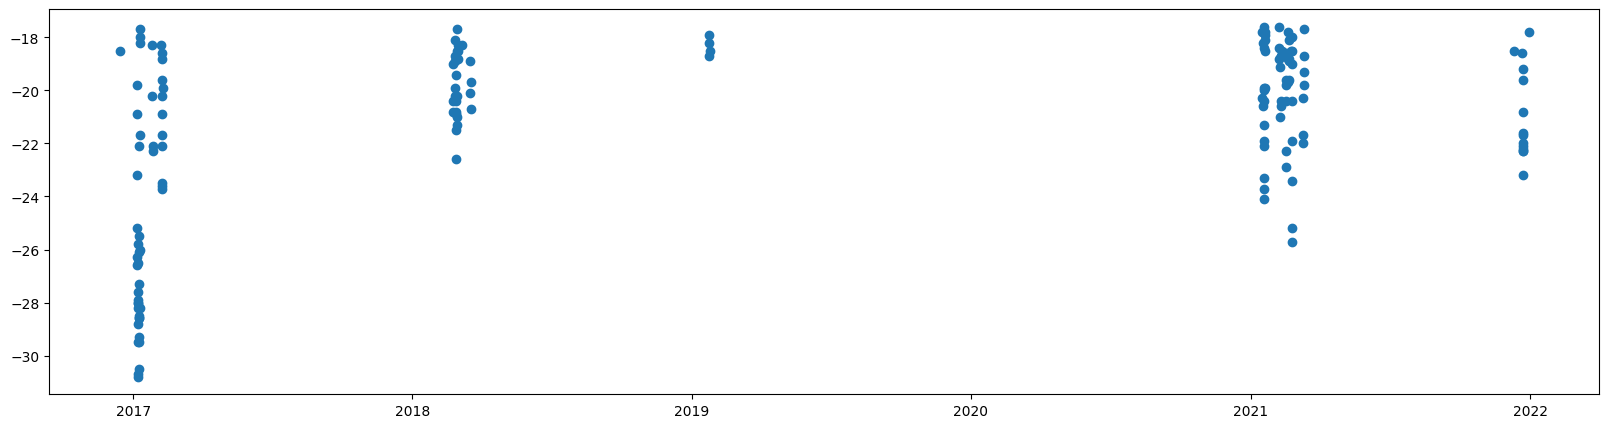

In [15]:
# Аномалии по годам
condition_anomaly = data['T'] < data['T'].quantile(0.01)

data_anomaly = data[condition_anomaly]

plt.figure(figsize=(20, 5))
# plt.plot(data_anomaly['date'], data_anomaly['T'])
plt.scatter(data_anomaly['date'], data_anomaly['T'])

In [17]:
data['dayofyear'] = data['date'].dt.dayofyear
data

C:\Users\santiperro\AppData\Local\Temp\ipykernel_2616\1454000923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dayofyear'] = data['date'].dt.dayofyear


,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff,date,dayofyear
0,2022-01-01 21:00:00,-3.1,734.7,752.3,NaN,89,"Ветер, дующий с северо-запада",4,2022-01-01 21:00:00,1
1,2022-01-01 18:00:00,-2.6,734.1,751.6,NaN,84,"Ветер, дующий с севера",3,2022-01-01 18:00:00,1
2,2022-01-01 15:00:00,-1.4,733.2,750.6,NaN,83,"Ветер, дующий с северо-запада",4,2022-01-01 15:00:00,1
3,2022-01-01 12:00:00,-1.5,733.2,750.6,NaN,92,"Ветер, дующий с западо-северо-запада",3,2022-01-01 12:00:00,1
4,2022-01-01 09:00:00,-1.8,732.8,750.3,NaN,94,"Ветер, дующий с запада",4,2022-01-01 09:00:00,1
...,...,...,...,...,...,...,...,...,...,...
15727,2016-08-01 15:00:00,28.5,744.9,760.8,NaN,44,"Ветер, дующий с юго-юго-запада",3,2016-08-01 15:00:00,214
15728,2016-08-01 12:00:00,26.6,745.4,761.5,NaN,49,"Ветер, дующий с юго-юго-запада",3,2016-08-01 12:00:00,214
15729,2016-08-01 09:00:00,23.7,745.3,761.5,NaN,60,"Ветер, дующий с запада",2,2016-08-01 09:00:00,214
15730,2016-08-01 06:00:00,18.2,745.0,761.5,NaN,89,"Ветер, дующий с западо-юго-запада",2,2016-08-01 06:00:00,214


In [18]:
data['dayofyear'].min(), data['dayofyear'].max()

(1, 366)

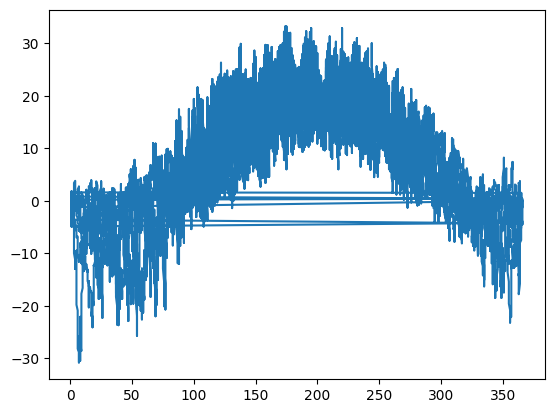

In [19]:
plt.plot(data['dayofyear'], data['T'])

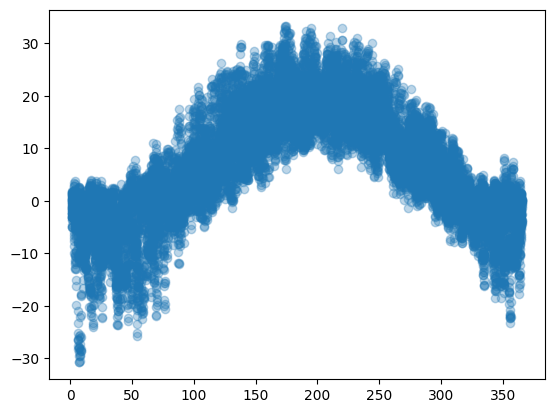

In [20]:
plt.scatter(data['dayofyear'], data['T'], alpha=0.3)

In [21]:
# Новый признак: косинус от дня в году.
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

data['cos_dayofyear']

C:\Users\santiperro\AppData\Local\Temp\ipykernel_2616\1178716135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)


0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
15727   -0.870285
15728   -0.870285
15729   -0.870285
15730   -0.870285
15731   -0.870285
Name: cos_dayofyear, Length: 15728, dtype: float64

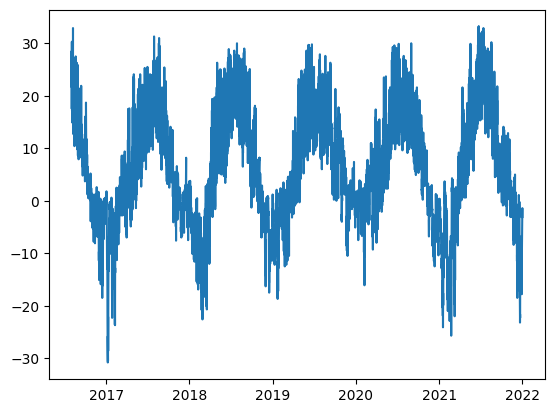

In [22]:
plt.plot(data['date'], data['T'])

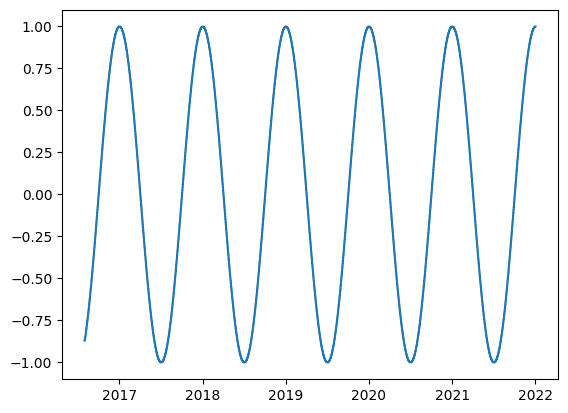

In [23]:
plt.plot(data['date'], data['cos_dayofyear'])

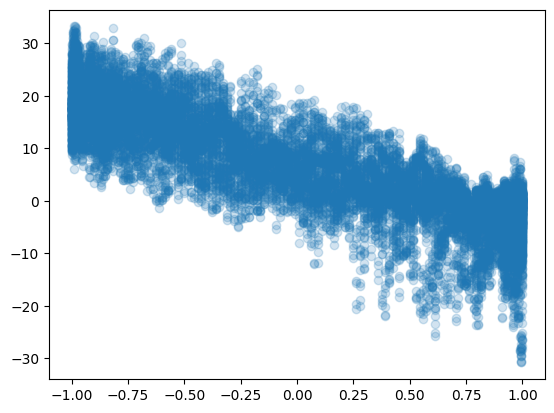

In [24]:
plt.scatter(data['cos_dayofyear'], data['T'], alpha=0.2)

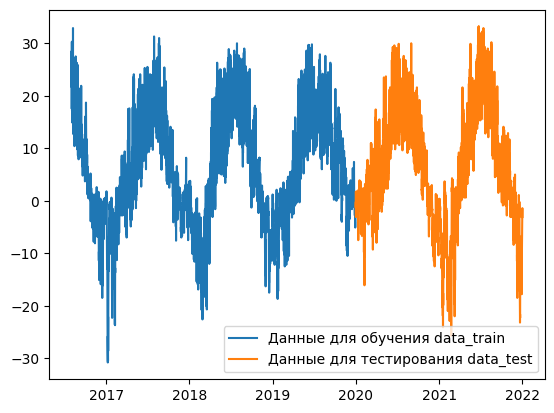

In [25]:
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

plt.plot(data_train['date'], data_train['T'], label='Данные для обучения data_train')
plt.plot(data_test['date'], data_test['T'], label='Данные для тестирования data_test')
plt.legend()

In [26]:
# Модель 1 Линейная реграссия, X - cos от дня в году

X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
y_train = data_train['T']
y_test = data_test['T']

Text(0.5, 1.0, 'График зависимости целевой переменной от факторов')

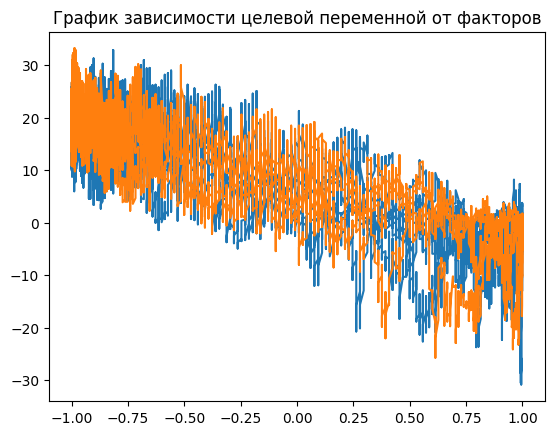

In [27]:
plt.plot(X_train['cos_dayofyear'], y_train)
plt.plot(X_test['cos_dayofyear'], y_test)
plt.title('График зависимости целевой переменной от факторов')

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

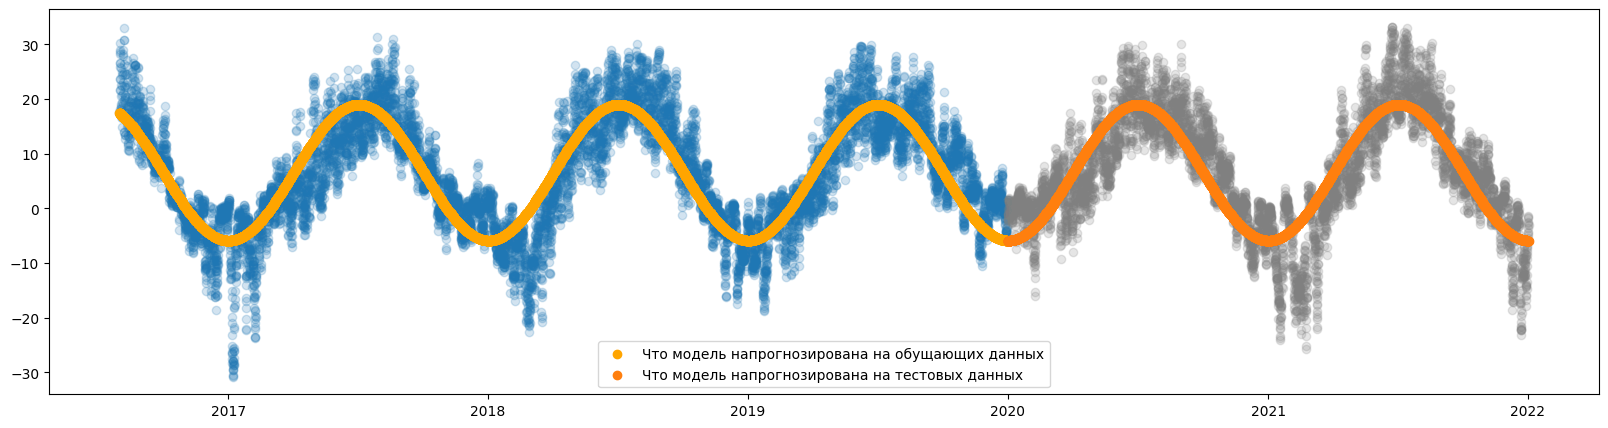

In [30]:
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], data_train['T'], alpha=0.2)
plt.scatter(data_test['date'], data_test['T'], alpha=0.2, color='gray')
plt.scatter(data_train['date'], pred_train, label='Что модель напрогнозирована на обущающих данных', color='orange')
plt.scatter(data_test['date'], pred_test, label='Что модель напрогнозирована на тестовых данных')
plt.legend()    

In [31]:
from sklearn.metrics import mean_absolute_error


print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

Средняя ошибка на тестовой выборке = 4.306135294146088
Средняя ошибка на тестовой выборке = 4.568779143310677


Средняя ошибка на обучающей выборке = 4.023387789534363
Средняя ошибка на тестовой выборке = 4.247049380054726


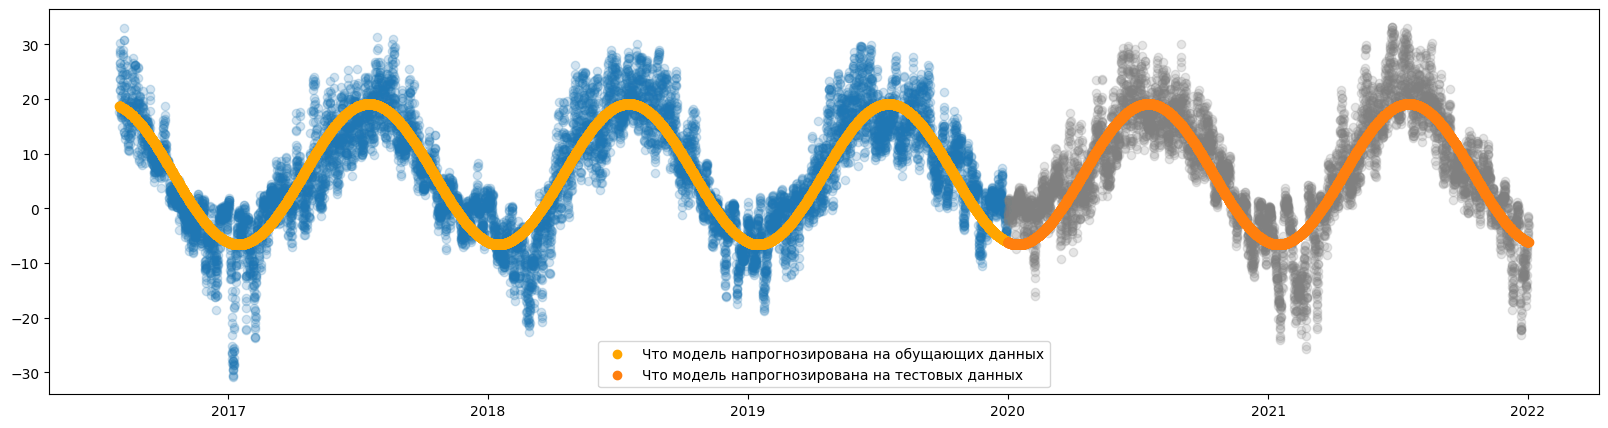

In [ ]:
# Модель 2 Линейная реграссия, X - sin и cos от дня в году
data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 366 * 2 * np.pi)

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

factors = ['cos_dayofyear', 'sin_dayofyear'] 
X_train = data_train[factors]
X_test = data_test[factors]

y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression() 
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], data_train['T'], alpha=0.2)
plt.scatter(data_test['date'], data_test['T'], alpha=0.2, color='gray')
plt.scatter(data_train['date'], pred_train, label='Что модель напрогнозирована на обущающих данных', color='orange')
plt.scatter(data_test['date'], pred_test, label='Что модель напрогнозирована на тестовых данных')
plt.legend()

print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

C:\Users\santiperro\AppData\Local\Temp\ipykernel_2616\18722343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)


Средняя ошибка на обучающей выборке = 3.765672437211961
Средняя ошибка на тестовой выборке = 4.584979938386569


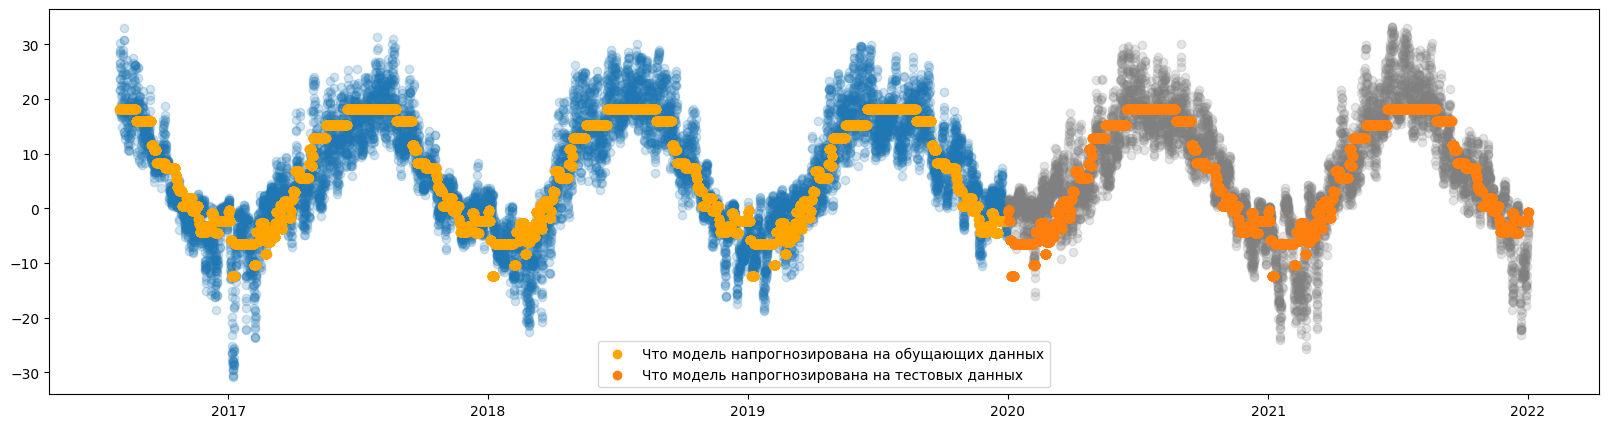

In [34]:
# Модель 3 (Дерево решений от дня в году)
from sklearn.tree import DecisionTreeRegressor

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

factors = ['dayofyear']
X_train = data_train[factors]
X_test = data_test[factors]
y_train = data_train['T']
y_test = data_test['T']

model = DecisionTreeRegressor(max_depth=6)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], data_train['T'], alpha=0.2)
plt.scatter(data_test['date'], data_test['T'], alpha=0.2, color='gray')
plt.scatter(data_train['date'], pred_train, label='Что модель напрогнозирована на обущающих данных', color='orange')
plt.scatter(data_test['date'], pred_test, label='Что модель напрогнозирована на тестовых данных')
plt.legend()

print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))